In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
FILE_PATH = '/content/sonnets.txt'
NUM_BATCHES = 16
LSTM_UNITS = 128
EMBEDDING_DIM = 100

In [3]:
with open(FILE_PATH, 'r') as f:
  text = f.read()

In [4]:
text

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [6]:
corpus = text.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


In [7]:
def fit_vectorizer(corpus):
    """
    Instantiates the vectorizer class on the corpus

    Args:
        corpus (list): List with the sentences.

    Returns:
        (tf.keras.layers.TextVectorization): an instance of the TextVectorization class containing the word-index dictionary, adapted to the corpus sentences.
    """

    tf.keras.utils.set_random_seed(65) # Do not change this line or you may have different expected outputs throughout the assignment

    ### START CODE HERE ###

    # Define the object
    vectorizer = tf.keras.layers.TextVectorization(ragged=True, standardize="lower_and_strip_punctuation")

    # Adapt the vectorizer to the corpus
    vectorizer.adapt(corpus)

    # Adapt it to the corpus


    ### END CODE HERE ###

    return vectorizer

In [8]:
vectorizer = fit_vectorizer(corpus)
total_words = len(vectorizer.get_vocabulary())
print(f"There are {total_words} words in the vocabulary")


There are 3189 words in the vocabulary


In [9]:
def n_gram_seqs(corpus, vectorizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        vectorizer (tf.keras.layers.TextVectorization): an instance of the TextVectorization class adapted in the corpus

    Returns:
        (list of tf.int64 tensors): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    ### START CODE HERE ###
    for line in corpus:
        tokens = vectorizer(line)
        for i in range(1, len(tokens)):
            n_gram_sequence = tokens[:i+1]
            input_sequences.append(n_gram_sequence)
    ### END CODE HERE ###

    return input_sequences

In [10]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], vectorizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 35, 489])>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([  35,  489, 1259])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([  35,  489, 1259,  164])>,
 <tf.Tensor: shape=(5,), dtype=int64, numpy=array([  35,  489, 1259,  164,  230])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([  35,  489, 1259,  164,  230,  582])>]

In [11]:

next_3_examples_sequence = n_gram_seqs(corpus[1:4], vectorizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[<tf.Tensor: shape=(2,), dtype=int64, numpy=array([  9, 935])>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([  9, 935, 143])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([  9, 935, 143, 369])>,
 <tf.Tensor: shape=(5,), dtype=int64, numpy=array([  9, 935, 143, 369, 101])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([  9, 935, 143, 369, 101, 171])>,
 <tf.Tensor: shape=(7,), dtype=int64, numpy=array([  9, 935, 143, 369, 101, 171, 207])>,
 <tf.Tensor: shape=(2,), dtype=int64, numpy=array([17, 23])>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([17, 23,  3])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([  17,   23,    3, 1006])>,
 <tf.Tensor: shape=(5,), dtype=int64, numpy=array([  17,   23,    3, 1006,   64])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([  17,   23,    3, 1006,   64,   31])>,
 <tf.Tensor: shape=(7,), dtype=int64, numpy=array([  17,   23,    3, 1006,   64,   31,   51])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([  17,   23,   

In [12]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, vectorizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15355
maximum length of sequences is: 11


In [13]:
# GRADED FUNCTION: pad_seqs

def pad_seqs(input_sequences, max_sequence_len):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        (np.array of int32): tokenized sequences padded to the same length
    """

    ### START CODE HERE ###

    padded_sequences = tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")

    ### END CODE HERE ###

    return padded_sequences

In [14]:
first_padded_seq = pad_seqs(first_example_sequence, max([len(x) for x in first_example_sequence]))
first_padded_seq

array([[   0,    0,    0,    0,   35,  489],
       [   0,    0,    0,   35,  489, 1259],
       [   0,    0,   35,  489, 1259,  164],
       [   0,   35,  489, 1259,  164,  230],
       [  35,  489, 1259,  164,  230,  582]], dtype=int32)

In [15]:
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[   0,    0,    0,    0,    0,    0,    9,  935],
       [   0,    0,    0,    0,    0,    9,  935,  143],
       [   0,    0,    0,    0,    9,  935,  143,  369],
       [   0,    0,    0,    9,  935,  143,  369,  101],
       [   0,    0,    9,  935,  143,  369,  101,  171],
       [   0,    9,  935,  143,  369,  101,  171,  207],
       [   0,    0,    0,    0,    0,    0,   17,   23],
       [   0,    0,    0,    0,    0,   17,   23,    3],
       [   0,    0,    0,    0,   17,   23,    3, 1006],
       [   0,    0,    0,   17,   23,    3, 1006,   64],
       [   0,    0,   17,   23,    3, 1006,   64,   31],
       [   0,   17,   23,    3, 1006,   64,   31,   51],
       [  17,   23,    3, 1006,   64,   31,   51,  803],
       [   0,    0,    0,    0,    0,    0,   27,  315],
       [   0,    0,    0,    0,    0,   27,  315,  745],
       [   0,    0,    0,    0,   27,  315,  745,  101],
       [   0,    0,    0,   27,  315,  745,  101,  209],
       [   0,    0,   27,  315,

In [16]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15355, 11)


In [17]:
# GRADED FUNCTION: features_and_labels

def features_and_labels_dataset(input_sequences, total_words):
    """
    Generates features and labels from n-grams and returns a tensorflow dataset

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        (tf.data.Dataset): Dataset with elements in the form (sentence, label)
    """
    ### START CODE HERE ###

    # Define the features an labels as discussed in the lectures
    features = input_sequences[:, :-1]
    labels = input_sequences[:, -1]

    # One hot encode the labels
    one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

    # Create the dataset
    dataset = tf.data.Dataset.from_tensor_slices((features, one_hot_labels))
    # Batch de dataset with number of batches given by the global variable
    batched_dataset = dataset.batch(NUM_BATCHES)

    ### END CODE HERE ##

    return batched_dataset

In [22]:
dataset_example = features_and_labels_dataset(first_padded_seq, total_words)

print("Example:\n")
for features, label in dataset_example.take(1):
    print(f"N grams:\n\n {features}\n")
    print(features.shape)
    print(f"Label shape:\n\n {label.shape}")

Example:

N grams:

 [[   0    0    0    0   35]
 [   0    0    0   35  489]
 [   0    0   35  489 1259]
 [   0   35  489 1259  164]
 [  35  489 1259  164  230]]

(5, 5)
Label shape:

 (5, 3189)


In [19]:
dataset = features_and_labels_dataset(input_sequences, total_words).prefetch(tf.data.AUTOTUNE)

print(f"Feature shape: {dataset.element_spec[0]}")
print(f"Label shape: {dataset.element_spec[1]}")

Feature shape: TensorSpec(shape=(None, 10), dtype=tf.int32, name=None)
Label shape: TensorSpec(shape=(None, 3189), dtype=tf.float64, name=None)


In [55]:
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
       (tf.keras Model): the text generator model
    """
    model = tf.keras.Sequential()

    ### START CODE HERE ###
    model.add(tf.keras.layers.Input(shape=(max_sequence_len,)))
    model.add(tf.keras.layers.Embedding(total_words, EMBEDDING_DIM))

    # Return only the last hidden state of the LSTM
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_UNITS, return_sequences=False)))
    model.add(tf.keras.layers.Dense(total_words, activation='softmax'))


    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics = ['accuracy'])

    ### END CODE HERE ###

    return model

In [56]:
model = create_model(total_words, max_sequence_len)

In [57]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 11, 100)             │         318,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3189)                │         819,573 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,372,969 (5.24 MB)

 Trainable params: 1,372,969 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
example_batch = dataset.take(1)

try:
	model.evaluate(example_batch, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function and last layer are compatible with one another.")
else:
	predictions = model.predict(example_batch, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (16, 3189)


In [59]:
history = model.fit(dataset, epochs=30, verbose=1)

Epoch 1/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 89s 42ms/step - accuracy: 0.0252 - loss: 7.0483
Epoch 2/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.0322 - loss: 6.1570
Epoch 3/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.0390 - loss: 5.7746
Epoch 4/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.0500 - loss: 5.5007
Epoch 5/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.0615 - loss: 5.2180
Epoch 6/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.0766 - loss: 4.9033
Epoch 7/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.0957 - loss: 4.6241
Epoch 8/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.1139 - loss: 4.4403
Epoch 9/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.1491 - loss: 4.1889
Epoch 10/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.1832 - loss: 3.9458
Epoch 11/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.2293 - loss: 3.7242
Epoch 12/30
960/960 ━━━━━━━━━━

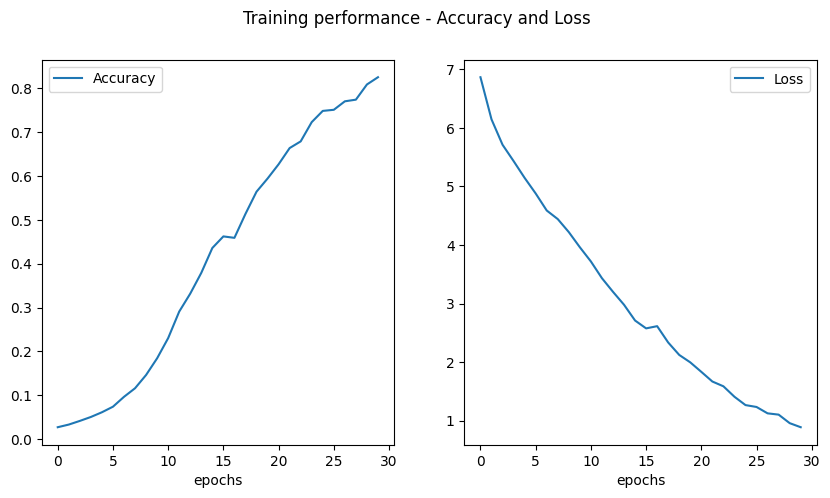

In [60]:
# Get training and validation accuracies
acc = history.history['accuracy']
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training performance - Accuracy and Loss')

for i, (data, label) in enumerate(zip([acc,loss], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data, label=label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

In [61]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    # Convert the text into sequences
    token_list = vectorizer(seed_text)
    # Pad the sequences
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict([token_list], verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = vectorizer.get_vocabulary()[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope still this life prove more lie prove of thee lie be well and lie so bad true love i am so chary prove me so dearer will so flatter prove prove me prove thee back to modern woe woe lie lie prove bird rest page foul prophetic fading he lie night dispraise knowst more bright rest fort general doth night groan doth stand lie o now no love you thine dear thine eye to show me me more bright basest blind lie seemd prove me so lie may be not so lie so true i thine eyes thee so change
